In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
paises=pd.read_csv('archive/country_vaccinations.csv')
paises=paises.fillna(0)
paises.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [3]:
ecuador=paises[paises['country'].isin(['Ecuador'])]

chile= paises[paises['country'].isin(['Chile'])]

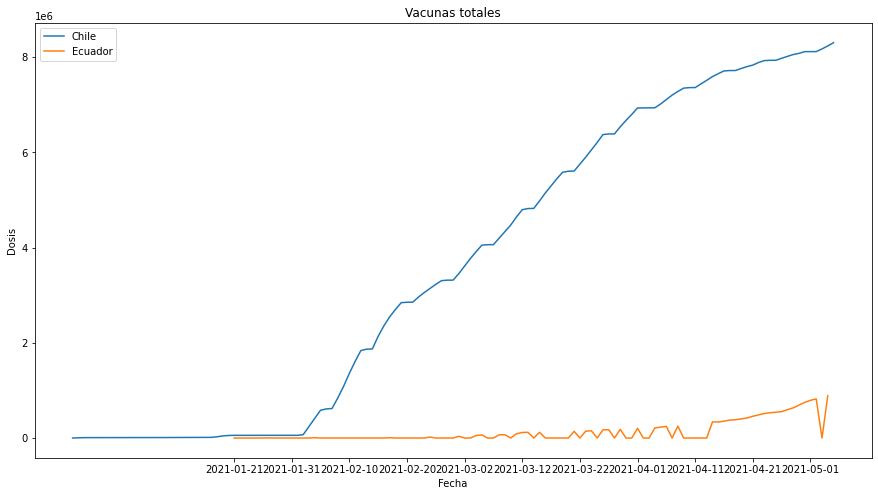

In [4]:
plt.figure(figsize=(15,8))
plt.plot(chile['date'],chile['people_vaccinated'] )
plt.plot(ecuador['date'],ecuador['people_vaccinated'] )
plt.xticks(ecuador.date[::10].tolist())
plt.title('Vacunas totales')
plt.xlabel('Fecha')
plt.ylabel('Dosis')
plt.legend(['Chile', 'Ecuador'])

In [5]:
from datetime import datetime,timedelta
ecuador['date'] = ecuador['date'].map(lambda x : (datetime.strptime(x, '%Y-%m-%d') - datetime.strptime("2021-01-01", '%Y-%m-%d')).days)
chile['date'] = chile['date'].map(lambda x : (datetime.strptime(x, '%Y-%m-%d') - datetime.strptime("2020-12-20", '%Y-%m-%d')).days)

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# regression polinomial datos chile


In [6]:
x_chile=chile['date'].values.reshape(-1,1)
y_chile=chile['people_vaccinated'].values.reshape(-1,1)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(x_chile)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_chile)
pol_pred=pol_reg.predict(poly_reg.fit_transform(x_chile))

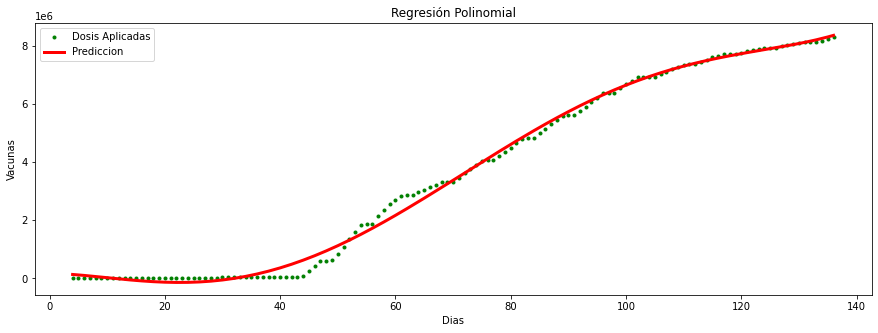

In [8]:
plt.figure(figsize = (15,5))

plt.plot(x_chile, y_chile,'.g')
plt.plot(x_chile, pol_pred,  '-', linewidth = 3, color='r')
plt.title('Regresión Polinomial')
plt.xlabel('Dias')
plt.ylabel('Vacunas')
plt.legend(['Dosis Aplicadas', 'Prediccion'])
plt.show()


Prueba tipos de regresion para los datos ecuador 

In [9]:
from sklearn.model_selection import train_test_split
x_ecu=ecuador['date'].values.reshape(-1,1)
y_ecu= ecuador['people_vaccinated'].values.reshape(-1,1)
X_train3, X_test3,y_train3, y_test3 = train_test_split(x_ecu, y_ecu, test_size=.2, random_state = 42)

In [10]:
model_ecu_total = LinearRegression()
model_ecu_total.fit(X_test3, y_test3)
y_pred3=model_ecu_total.predict(x_ecu)
print("Score Lineal: ",model_ecu_total.score(X_test3, y_test3))

Score Lineal:  0.7088520885577543


Text(0.5, 1.0, 'Total Vacunados')

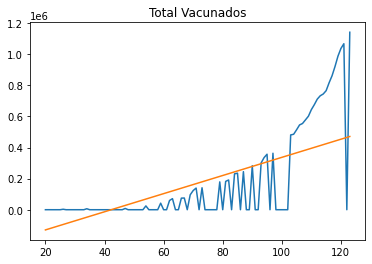

In [11]:
plt.plot(ecuador['date'], ecuador['total_vaccinations'])
plt.plot(ecuador['date'],y_pred3)
plt.title('Total Vacunados')

observamos claramente como una regresion lineal no cubriria todos los datos

In [12]:
poly_reg_ecu = PolynomialFeatures(degree=3)
X_poly = poly_reg_ecu.fit_transform(x_ecu)
pol_reg_ecu = LinearRegression()
pol_reg_ecu.fit(X_poly, y_ecu)
print("Score Polinomial: ",pol_reg_ecu.score(X_poly, y_ecu))
pol_pred_ecu=pol_reg_ecu.predict(poly_reg_ecu.fit_transform(x_ecu))

Score Polinomial:  0.7780841198426646


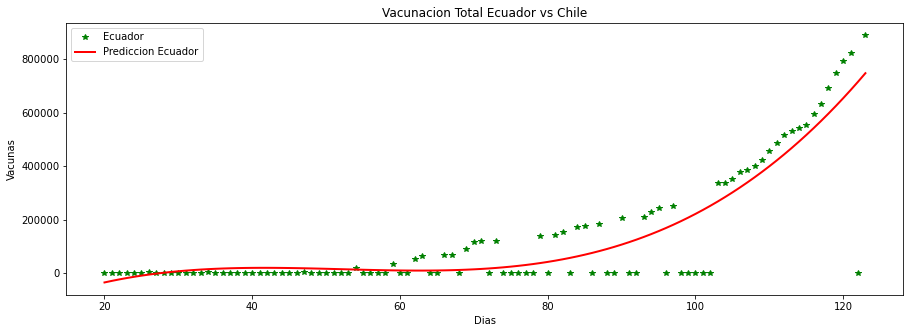

In [13]:
plt.figure(figsize = (15,5))

plt.plot(x_ecu, y_ecu,'*g',)
plt.plot(x_ecu, pol_pred_ecu,  '-', linewidth = 2, color='r')
plt.title('Vacunacion Total Ecuador vs Chile')
plt.xlabel('Dias')
plt.ylabel('Vacunas')
plt.legend(['Ecuador', 'Prediccion Ecuador','Chile','Prediccion Chile'])
plt.show()

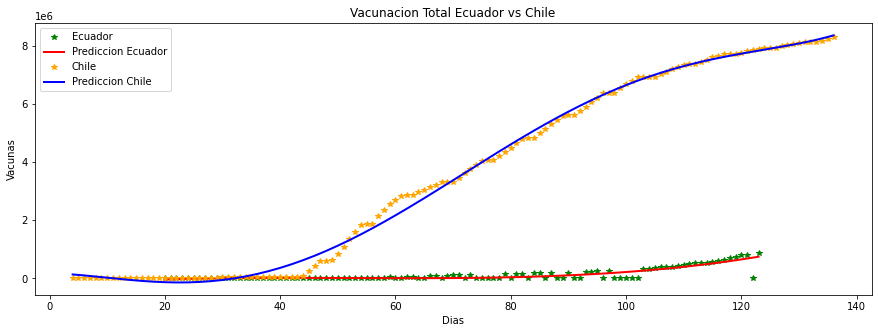

In [14]:
plt.figure(figsize = (15,5))

plt.plot(x_ecu, y_ecu,'*g',)
plt.plot(x_ecu, pol_pred_ecu,  '-', linewidth = 2, color='r')

plt.plot(x_chile,y_chile,'*', color='orange')
plt.plot(x_chile,pol_pred,'-', linewidth = 2, color='blue')
plt.title('Vacunacion Total Ecuador vs Chile')
plt.xlabel('Dias')
plt.ylabel('Vacunas')
plt.legend(['Ecuador', 'Prediccion Ecuador','Chile','Prediccion Chile'])
plt.show()

In [15]:
# Prediccion dias
fecha_inicio = '15/05/2021'
fecha_fin =  '25/08/2021'
fecha_inicio=(datetime.strptime(fecha_inicio, '%d/%m/%Y') - datetime.strptime("01/01/2021", '%d/%m/%Y')).days
fecha_fin =(datetime.strptime(fecha_fin, '%d/%m/%Y') - datetime.strptime("01/01/2021", '%d/%m/%Y')).days 

In [16]:
dias=np.arange(fecha_inicio, fecha_fin, dtype=int)

In [17]:
predic_ecu=pol_reg_ecu.predict(poly_reg_ecu.fit_transform(dias.reshape(-1,1)))
predic_chile=pol_reg.predict(poly_reg.fit_transform(dias.reshape(-1,1)))

Text(0.5, 1.0, 'Prediccion Ecuador')

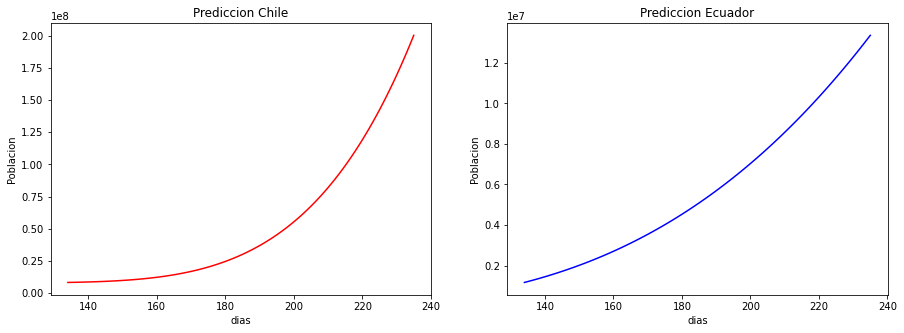

In [18]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
plt.plot(dias, predic_chile,'-r')
plt.xlabel('dias')
plt.ylabel('Poblacion')
plt.title('Prediccion Chile')

plt.subplot(1, 2, 2)
plt.plot(dias, predic_ecu,'-b')
plt.xlabel('dias')
plt.ylabel('Poblacion')
plt.title('Prediccion Ecuador')

# Comparacion Ecuador vs Kazajistan



In [19]:
kaza= paises[paises['country'].isin(['Kazakhstan'])]

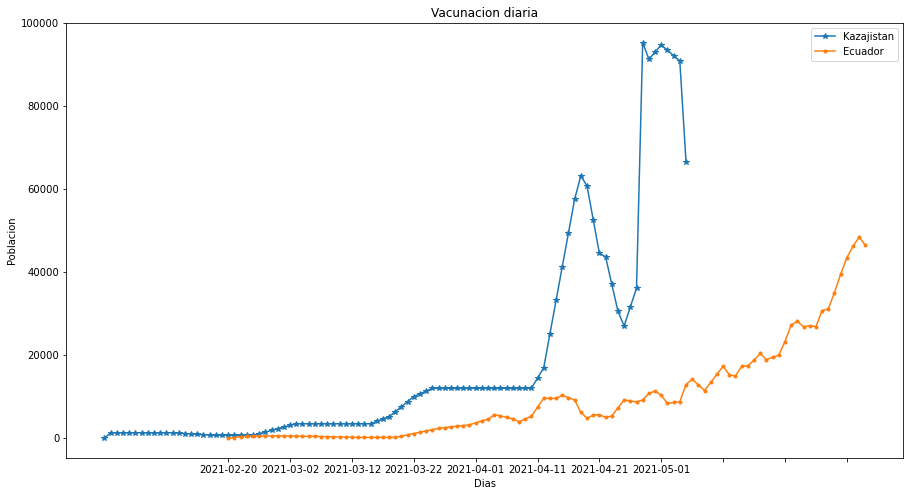

In [20]:
plt.figure(figsize=(15,8))
plt.plot(kaza['date'],kaza['daily_vaccinations'],'-*' )
plt.plot(ecuador['date'],ecuador['daily_vaccinations'],'.-' )
plt.xticks(ecuador.date[::10].tolist())
plt.title('Vacunacion diaria')
plt.xlabel('Dias')
plt.ylabel('Poblacion')
plt.legend(['Kazajistan', 'Ecuador'])

In [21]:
kaza['date'] = kaza['date'].map(lambda x : (datetime.strptime(x, '%Y-%m-%d') - datetime.strptime("2020-12-20", '%Y-%m-%d')).days)

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
x_kaza=kaza['date'].values.reshape(-1,1)
y_kaza=kaza['daily_vaccinations']
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(x_kaza,y_kaza
                                                            , test_size=.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train_k, y_train_k) 
pred_train_rf= model_rf.predict(X_train_k)

In [23]:

print("Precision del modelo, valores Train = ",r2_score(y_train_k, pred_train_rf))

pred_test_rf = model_rf.predict(X_test_k)
#print(np.sqrt(mean_squared_error(y_test_k,pred_test_rf)))
print("Precision del modelo, valores test = ",r2_score(y_test_k, pred_test_rf))

Precision del modelo, valores Train =  0.9931855013257307
Precision del modelo, valores test =  0.971517109082715


In [24]:
dias=np.arange(42,137, dtype=int)
pred_dia=model_rf.predict(dias.reshape(-1,1))


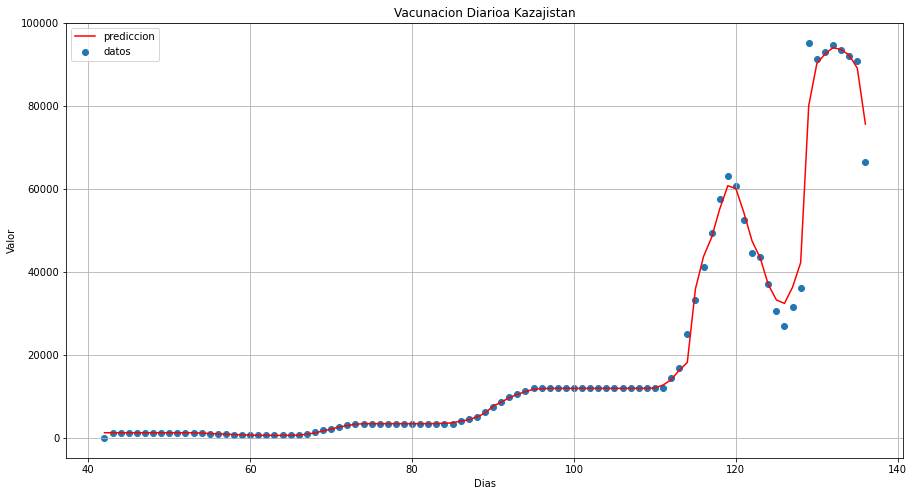

In [25]:
plt.figure(figsize=(15,8))
plt.scatter(x=x_kaza.flatten(),y=y_kaza, label='datos')
plt.plot(x_kaza.flatten(),pred_dia,'-r', label="prediccion")
#plt.xticks(rotation=70,color='black', size=12)
plt.grid(True)
plt.title("Vacunacion Diarioa Kazajistan")
plt.xlabel('Dias')  
plt.ylabel('Valor') 
plt.legend()
plt.show() 

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear = model_linear.fit(x_ecu,y_ecu)
print(" Score Lineal : ",model_linear.score(x_ecu,y_ecu))

 Score Lineal :  0.517604262077545


In [27]:

y_ecu= ecuador['daily_vaccinations'].values.reshape(-1,1)
x_ecu=ecuador['date'].values.reshape(-1,1)
poly_ecu_diaria = PolynomialFeatures(degree=4)
X_poly_diaria = poly_ecu_diaria.fit_transform(x_ecu)
pol_ecu_diaria = LinearRegression()
pol_ecu_diaria.fit(X_poly_diaria, y_ecu)

pol_ecu_diaria_pred=pol_ecu_diaria.predict(poly_ecu_diaria.fit_transform(x_ecu))
print("Score Polinomial : ",pol_ecu_diaria.score(X_poly_diaria,y_ecu))

Score Polinomial :  0.9810772384727229


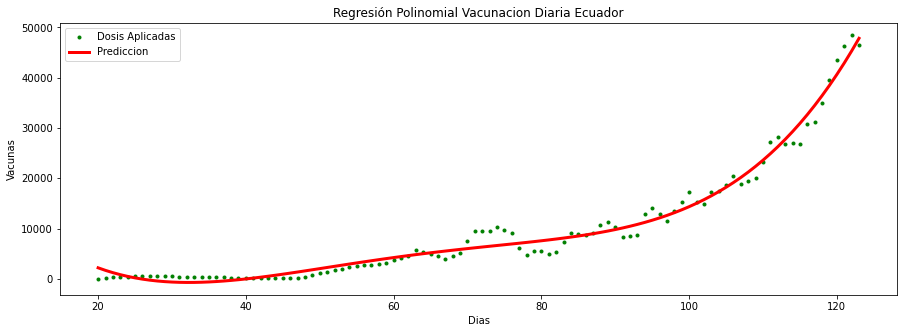

In [28]:
plt.figure(figsize = (15,5))

plt.plot(x_ecu, y_ecu,'.g')
plt.plot(x_ecu, pol_ecu_diaria_pred,  '-', linewidth = 3, color='r')
plt.title('Regresión Polinomial Vacunacion Diaria Ecuador')
plt.xlabel('Dias')
plt.ylabel('Vacunas')
plt.legend(['Dosis Aplicadas', 'Prediccion'])
plt.show()

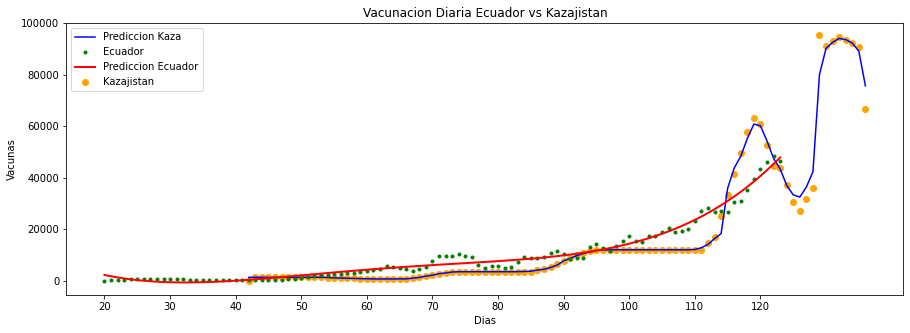

In [29]:
plt.figure(figsize = (15,5))

plt.scatter(x=x_kaza.flatten(),y=y_kaza, color='orange')
plt.plot(x_kaza.flatten(),pred_dia,'-r', color='blue')

plt.plot(x_ecu, y_ecu,'.g')
plt.plot(x_ecu, pol_ecu_diaria_pred,  '-', linewidth = 2, color='r')
plt.title('Vacunacion Diaria Ecuador vs Kazajistan')
plt.xticks(ecuador.date[::10].tolist())
plt.xlabel('Dias')
plt.ylabel('Vacunas')
plt.legend(['Prediccion Kaza', 'Ecuador','Prediccion Ecuador','Kazajistan'])
plt.show()

# Resultados

In [30]:
fecha_fin='10/01/2022'
fecha_fin=(datetime.strptime(fecha_fin, '%d/%m/%Y') - datetime.strptime("01/01/2021", '%d/%m/%Y')).days
dia_kaza=np.arange(40,fecha_fin, dtype=int)
pred_total_kaza=model_rf.predict(dia_kaza.reshape(-1,1))
pred_total_kaza.sum()

19665224.199999996

In [31]:
fecha_fin_ecu='10/12/2021'
fecha_fin_ecu=(datetime.strptime(fecha_fin_ecu, '%d/%m/%Y') - datetime.strptime("01/01/2021", '%d/%m/%Y')).days
pol_ecu_diaria.predict(poly_ecu_diaria.fit_transform([[fecha_fin_ecu]]))

array([[18735510.69655354]])